In [84]:
import numpy as np
import pandas as pd
import sys
import os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))
from src.curve_fit import fit,fitted
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("../data/ice-motor-eff.csv")
data = {}
for col in df.columns:
    arr = np.array(df[col])
    arr = arr[~np.isnan(arr)]
    data[col]= arr

Generate fit params

In [86]:
params = {}
fns = {}
metrics = ["efficiency"]
for metric in metrics:
    params[metric], fns[metric] = fit(data[f"{metric}X"],data[f"{metric}Y"],mode='all')

Plot results

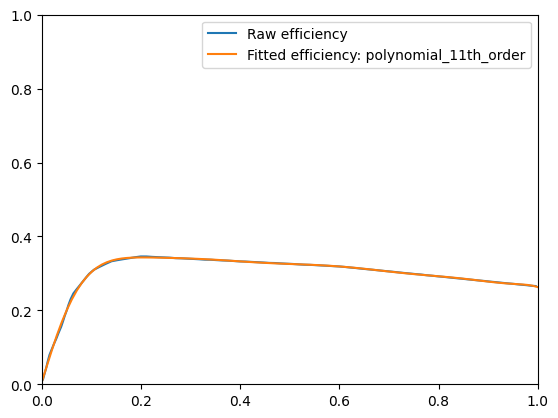

In [87]:
plt.figure()
x = np.linspace(0,1,100)
for metric in metrics:
    y = fitted(x,params[metric],fns[metric])
    plt.plot(data[f"{metric}X"],data[f"{metric}Y"],label=f"Raw {metric}")
    plt.plot(x,y,label=f"Fitted {metric}: {fns[metric].__name__}")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

In [88]:
params['efficiency']

[4.295619416199058,
 5.592125774538136,
 -418.6144742131811,
 -24.841274370957077,
 3507.7342899247446,
 -15083.988274998506,
 40180.33730251919,
 -69179.7191035756,
 77292.42489485037,
 -54149.84038625687,
 21622.197497866884,
 -3755.3204098868027,
 0.005205429303159347]

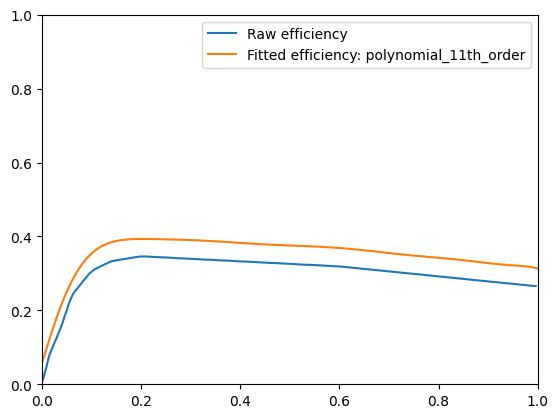

In [90]:
params['efficiency'][-1] += 0.05

plt.figure()
x = np.linspace(0,1,100)
for metric in metrics:
    y = fitted(x,params[metric],fns[metric])
    plt.plot(data[f"{metric}X"],data[f"{metric}Y"],label=f"Raw {metric}")
    plt.plot(x,y,label=f"Fitted {metric}: {fns[metric].__name__}")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()